# Exercise 2 - First learner

First we generate the training data that is going to be fed into our first learner. The underlying function will be:

$$y(x) = sin(x) + cos(2x)$$

Then an appropriate input sample $X_N$ could be within the range of $[-2\pi, 2\pi]$, in this case 50 samples are generated.

a) Generate a data set D with N = 50 data points utilizing the given function. Note that the data set should not be optimal due to the noise $ν ∼ N(µ, σ^2)$. Consider reasonable range for $x$ and $ν$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2*np.pi,2*np.pi,50)
y = np.sin(x) + np.cos(2*x)

noise = np.random.normal(0,0.2,50)
y_noise = y + noise

b) Plot the function $y(x)$ and the generated data samples.

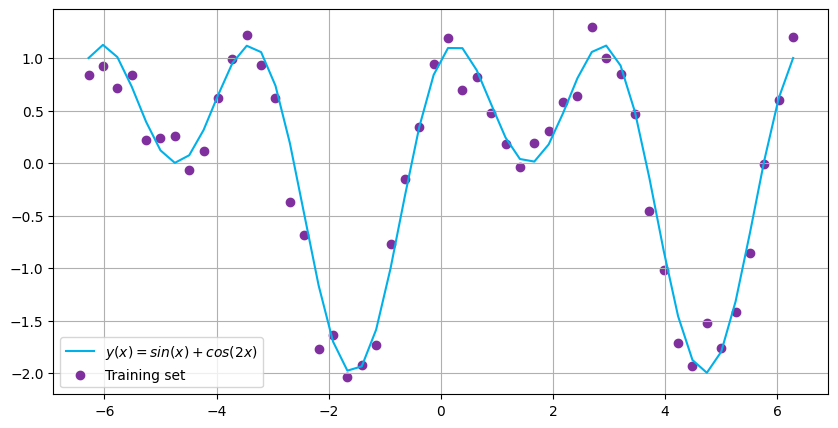

In [2]:
plt.figure(figsize=(10,5))
plt.plot(x,y,label='$y(x) = sin(x) + cos(2x)$', color='#00b1e9')
plt.scatter(x,y_noise,label='Training set',color='#80309e')
plt.legend()
plt.grid()
plt.show()

c) Use a simple learner, e.g., a feed-forward neural network with one hidden layer to learn the model. Train the network with the dataset D and try different hidden neurons size (1, 10, 100).

In [3]:
import torch
import torch.nn as nn

More code...

# Professor code

## Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

#Seed for generating random numbers so that they will be deterministic (whats deterministic?)

#torch.manual_seed(42)

## Dataset

In [5]:
N = 50
y = lambda x: np.sin(x) + np.cos(2*x)

x_data = np.random.uniform(0, 2*np.pi, N)
y_data = y(x_data) + np.random.normal(0, 0.1, N)

## Plotting data

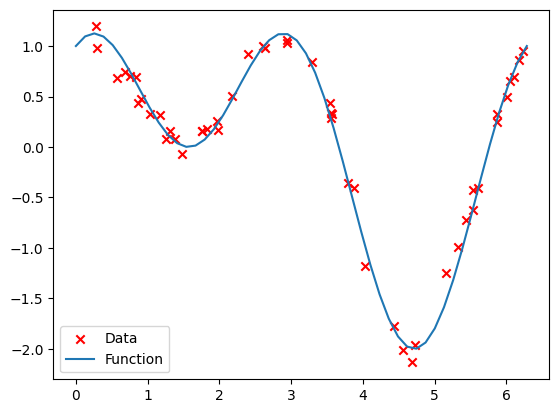

In [6]:
plt.figure()
plt.scatter(x_data,y_data,label='Data',color='red',marker='x')
plt.plot(np.linspace(0,2*np.pi,N),y(np.linspace(0,2*np.pi,N)),label='Function')
plt.legend()
plt.show()

## Simple feed-forward neural network

In [7]:
n_hidden = 10
epochs = 10000
learning_rate = 0.1
#Epochs --> How many updates do we want in our network. Few or too many updates can have a negative impact

model = nn.Sequential(nn.Linear(1,n_hidden), nn.Tanh(),nn.Linear(n_hidden, 1)) #Tanh is the "activation function"


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

## Training the network

In [8]:
#print(x_data.shape)
#print(x_data[:,None]) #50 individual arrays is the form that we need to train the network in pytorch

x_data_tensor = torch.from_numpy(x_data[:,None]).float()
y_data_tensor = torch.from_numpy(y_data[:,None]).float()

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_data_tensor)
    loss = criterion(y_pred,y_data_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss:{loss.item()}')

Epoch 0, Loss:0.6607627272605896
Epoch 1000, Loss:0.005973451305180788
Epoch 2000, Loss:0.00571367098018527
Epoch 3000, Loss:0.005698056425899267
Epoch 4000, Loss:0.005697005428373814
Epoch 5000, Loss:0.007182480301707983
Epoch 6000, Loss:0.009297378361225128
Epoch 7000, Loss:0.005884937476366758
Epoch 8000, Loss:0.005773359443992376
Epoch 9000, Loss:0.0068518007174134254


## Testing trained network

In [9]:
N_test = 20
x_test = np.linspace(0,2*np.pi, N_test)
y_test = y(x_test)

x_test_tensor = torch.from_numpy(x_test[:,None]).float()
y_test_tensor = torch.from_numpy(y_test[:,None]).float()

with torch.no_grad():
    y_pred = model(x_test_tensor)
    loss = criterion(y_pred, y_test_tensor)

print(f'Test Loss: {loss.item()}')

Test Loss: 0.008608526550233364


## Plotting results

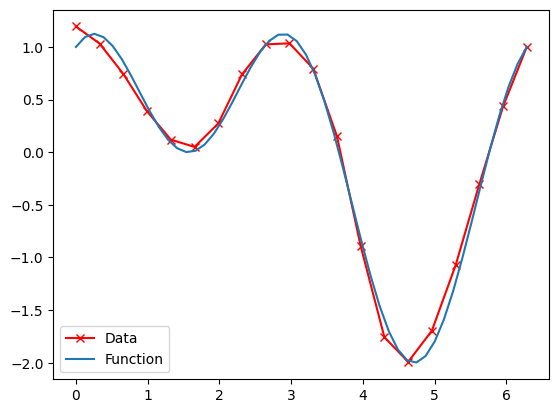

In [10]:
plt.figure()
plt.plot(x_test,y_pred.numpy(),label='Data',color='red',marker='x')
plt.plot(np.linspace(0,2*np.pi,N),y(np.linspace(0,2*np.pi,N)),label='Function')
plt.legend()
plt.show()